In [56]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

In [57]:
import pandas as pd
import io
import os
import pyarrow.parquet as pq
import numpy as np

In [58]:
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)

# Loading data

In [60]:
script_dir = os.path.dirname('__file__') #<-- absolute dir the script is in
rel_path = "s3_HOTEL_CREATED_files/"
abs_file_path = os.path.join(script_dir, rel_path)
dataset = pq.ParquetDataset(abs_file_path)
table = dataset.read()

In [61]:
hotel_created = table.to_pandas()
hotel_created

,HotelNotifications
0,[{'NotificationMeta': {'X-Correlation-ID': '89...
1,[{'NotificationMeta': {'X-Correlation-ID': '5a...
2,[{'NotificationMeta': {'X-Correlation-ID': 'fd...
3,[{'NotificationMeta': {'X-Correlation-ID': 'f8...
4,[{'NotificationMeta': {'X-Correlation-ID': '8d...
5,[{'NotificationMeta': {'X-Correlation-ID': '12...


In [62]:
hotel_created.iloc[0]

HotelNotifications    [{'NotificationMeta': {'X-Correlation-ID': '89...
Name: 0, dtype: object

# Splliting data

In [64]:
def explode_and_split(dataframe: pd.DataFrame, column: str):
    unnested = dataframe.explode(column)
    return pd.DataFrame(list(unnested[column]))

def split_and_merge(dataframe: pd.DataFrame, column: str):
    splited = pd.DataFrame(list(dataframe[column]))
    merged = dataframe.merge(splited, left_index=True, right_index=True)
    return merged.drop(columns=[column])

def explode_split_and_merge(dataframe: pd.DataFrame, column: str):
    unnested = dataframe.explode(column)
    splited = pd.DataFrame(list(unnested[column]))
    merged = splited.merge(unnested, left_index=True, right_index=True)
    return merged.drop(columns=[column])



In [93]:
Hotel_Created_Messages_splited = explode_and_split(hotel_created, "HotelNotifications")
Hotel_Created_Messages_splited

,NotificationMeta,CmmHotel
0,{'X-Correlation-ID': '893bea5c-242b-4642-a856-...,"{'CmHotelId': '77131', 'Origin': 'synxis', 'Na..."
1,{'X-Correlation-ID': '5a18defa-f317-42ba-9450-...,"{'CmHotelId': '30718', 'Origin': 'synxis', 'Na..."
2,{'X-Correlation-ID': 'fd1bc51f-3ee8-4a3c-aade-...,"{'CmHotelId': '59630', 'Origin': 'synxis', 'Na..."
3,{'X-Correlation-ID': '4a4e5e36-a752-4474-8eee-...,"{'CmHotelId': '59623', 'Origin': 'synxis', 'Na..."
4,{'X-Correlation-ID': 'f83f1477-fc16-415e-b23f-...,"{'CmHotelId': '79754', 'Origin': 'synxis', 'Na..."
5,{'X-Correlation-ID': '21423923-69ab-413c-bf35-...,"{'CmHotelId': '59628', 'Origin': 'synxis', 'Na..."
6,{'X-Correlation-ID': 'e2705626-cdc0-4563-acbd-...,"{'CmHotelId': '59622', 'Origin': 'synxis', 'Na..."
7,{'X-Correlation-ID': '8d6141b8-9cca-452a-94ba-...,"{'CmHotelId': 'COYX', 'Origin': 'siteminder', ..."
8,{'X-Correlation-ID': '1290b4d7-a673-4a84-a163-...,"{'CmHotelId': 'COZ8', 'Origin': 'siteminder', ..."


In [94]:
Hotel_Created_Notif = pd.DataFrame(list(Hotel_Created_Messages_splited["CmmHotel"]))

In [106]:
Hotel_Created_Notif

,0,0_x,0_y,CmHotelId,Origin,Name,Country,Address,Latitude,Longitude,Website,Telephone,Description,RoomCount,ContactPerson,Type,Currency,Status,Policies,OriginalData
0,NaN,None,NaN,77131,synxis,The TownHouse Mykonos,GR,"Manto Square Cyclades, 84600, Greece Mykonos T...",37.447385,25.329860,https://www.mykonostownhousehotel.com/,+30 21 1198 9344,"Located in the cosmopolitan town of Mykonos, T...",18.0,None,5-star Hotel,EUR,None,None,"{""bidroom_hotel_id"":""587855""}"
1,NaN,None,NaN,30718,synxis,Alda Hotel Reykjavik,IS,Laugavegur 66,64.144044,-21.921354,https://www.icelandairhotels.com/en/hotels/rey...,+354 553 9366,Located on Laugavegur shopping street in centr...,88.0,None,4-star Hotel,ISK,None,None,"{""bidroom_hotel_id"":""428289""}"
2,NaN,None,NaN,59630,synxis,Icelandair Hotel Reykjavik Natura,IS,Nautholsvegur 52,64.130673,-21.932616,https://www.icelandairhotels.com/en/hotels/rey...,+354 444 4500,This eco-friendly hotel is next to Oskjuhlid H...,220.0,None,4-star Hotel,ISK,None,None,"{""bidroom_hotel_id"":""471234""}"
3,NaN,None,NaN,59623,synxis,Icelandair Hotel Herad,IS,Midvangur 5-7,65.261771,-14.405994,https://www.icelandairhotels.com/en/hotels/eas...,+354 444 4000,"Hotel Herad is situated in Egilsstadir, 5 km f...",60.0,None,3-star Hotel,ISK,None,None,"{""bidroom_hotel_id"":""423819""}"
4,NaN,None,NaN,79754,synxis,Icelandair Hotel Myvatn,IS,Reynihlio,65.645190,-16.914793,https://www.icelandairhotels.com/en/hotels/nor...,+354 444 4000,"This hotel is situated on Lake Myvatn, 3.3 km ...",59.0,None,3-star Hotel,EUR,None,None,"{""bidroom_hotel_id"":""471242""}"
5,NaN,None,NaN,59628,synxis,Icelandair Hotel Reykjavik Marina,IS,Myrargata 2 Vesturbaer,64.150889,-21.945705,https://www.icelandairhotels.com/en/hotels/rey...,+354 444 4000,Set in the popular 101 harbor district of Reyk...,154.0,None,4-star Hotel,ISK,None,None,"{""bidroom_hotel_id"":""431066""}"
6,NaN,None,NaN,59622,synxis,Icelandair Hotel Akureyri,IS,Thingvallastraeti 23,65.679123,-18.100421,https://www.icelandairhotels.com/en/hotels/nor...,+354 444 4000,"Located in Akureyri, this hotel offers fresh r...",99.0,None,3-star Hotel,ISK,None,None,"{""bidroom_hotel_id"":""471259""}"
7,NaN,None,NaN,COYX,siteminder,Adonis Les Terrasses Des Bottières By Olydea,FR,Les Bottières,45.267003,6.298634,https://www.olydea.com/,04 48 20 03 19,"Providing a terrace, Adonis Les Bottières By O...",NaN,None,Other,EUR,None,None,"{""bidroom_hotel_id"":""592233""}"
8,NaN,None,NaN,COZ8,siteminder,Adonis Fontaine du Roi by Olydea,FR,La Chal,45.215469,6.260033,https://www.olydea.com/,04 48 20 03 19,"Featuring a terrace, Adonis Saint Jean d'Arves...",NaN,None,Other,EUR,None,None,"{""bidroom_hotel_id"":""592244""}"


In [98]:
Hotel_Created_Notif = pd.DataFrame(list(Hotel_Created_Messages_splited["CmmHotel"]))
Hotel_Created_Notif = explode_split_and_merge(Hotel_Created_Notif, "Photos")
Hotel_Created_Notif = explode_split_and_merge(Hotel_Created_Notif, "Fees")
Hotel_Created_Notif = explode_split_and_merge(Hotel_Created_Notif, "Amenities")


In [105]:
Hotel_Created_Notif.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   0              0 non-null      float64
 1   0_x            0 non-null      object 
 2   0_y            0 non-null      float64
 3   CmHotelId      9 non-null      object 
 4   Origin         9 non-null      object 
 5   Name           9 non-null      object 
 6   Country        9 non-null      object 
 7   Address        9 non-null      object 
 8   Latitude       9 non-null      float64
 9   Longitude      9 non-null      float64
 10  Website        9 non-null      object 
 11  Telephone      9 non-null      object 
 12  Description    9 non-null      object 
 13  RoomCount      7 non-null      float64
 14  ContactPerson  0 non-null      object 
 15  Type           9 non-null      object 
 16  Currency       9 non-null      object 
 17  Status         0 non-null      object 
 18  Policies      

# Data Analysis

In [104]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

In [107]:
font = {'family' : 'sans serif',
        'weight' : 'bold',
        'size'   : 22}

matplotlib.rc('font', **font)

## Origin of hotel creation

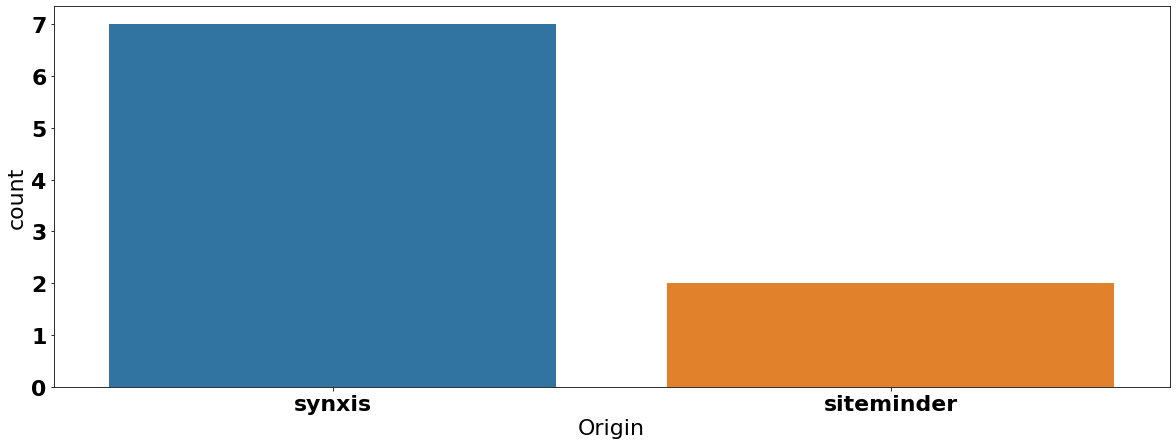

In [110]:
countplt, ax = plt.subplots(figsize = (20,7))
ax = sns.countplot(x="Origin", data=Hotel_Created_Notif)

## Hotel countries

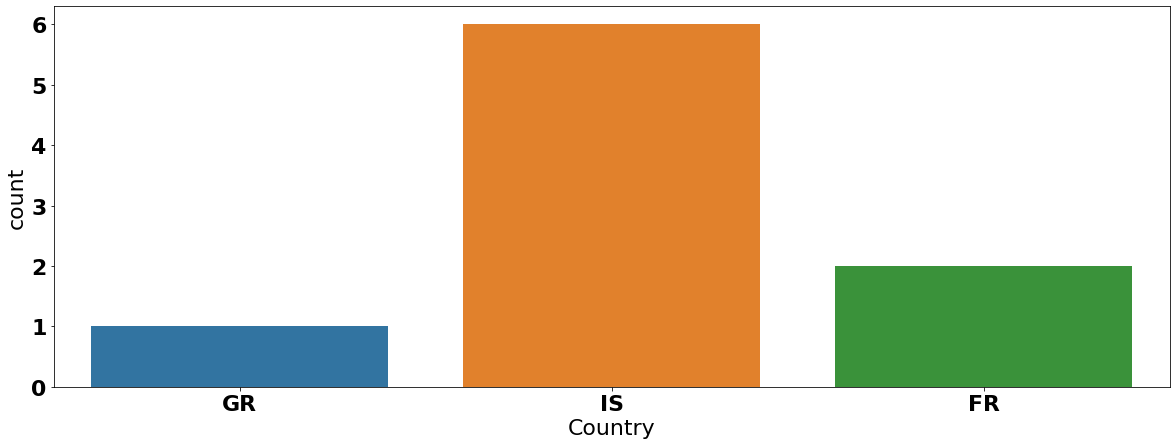

In [111]:
countplt, ax = plt.subplots(figsize = (20,7))
ax = sns.countplot(x="Country", data=Hotel_Created_Notif)

## Hotel types

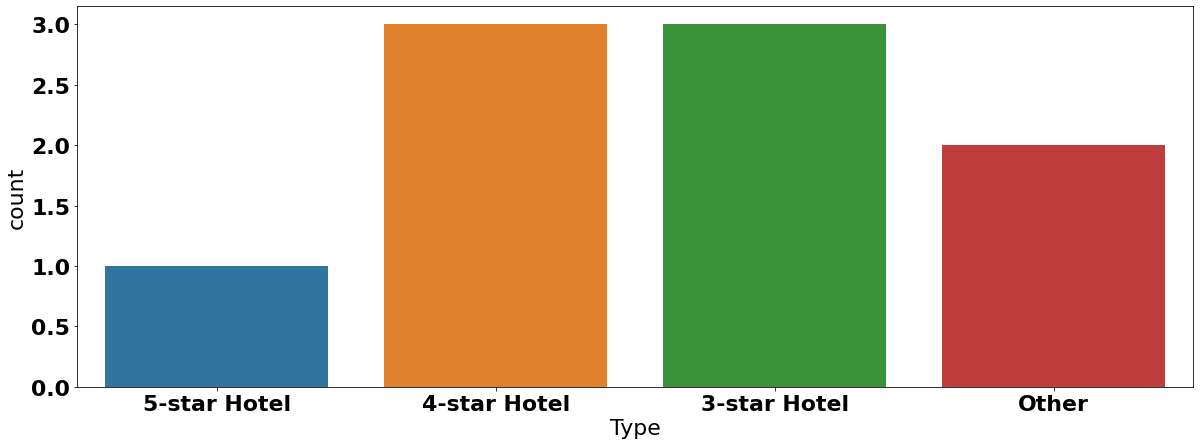

In [113]:
countplt, ax = plt.subplots(figsize = (20,7))
ax = sns.countplot(x="Type", data=Hotel_Created_Notif)